In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
UP = 0
DOWN = 1
RIGHT = 2
LEFT = 3
ACTION = [UP, DOWN, RIGHT, LEFT]
high = 4
length = 12
START = [3, 0]
GOAL = [3, 11]

q_values = np.zeros((high,length, len(ACTION)))

In [3]:
q_values

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
      

In [4]:
q_values[0] # state s36 - s47

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
q_values[1] # state s24 - s35

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [6]:
q_values[2] # state s12 - s23

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
q_values[3] # state s0 - s11

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
def policy(q_values, state, epsilon=0.1):
    """
    Choose action for given state. 
    :param q_values:
    :param state:
    :param epsilon: prawdopodobieństwo podejmowania decyzji losowej
    :return:
    """
    if random.random() < epsilon:
        return np.random.choice(ACTION) # losowa akcja  
    else:
        return np.argmax(q_values[state[0]][state[1]]) # zwrócenie akcji o największej wartości q_value 

In [9]:
def reset_game():
    return START

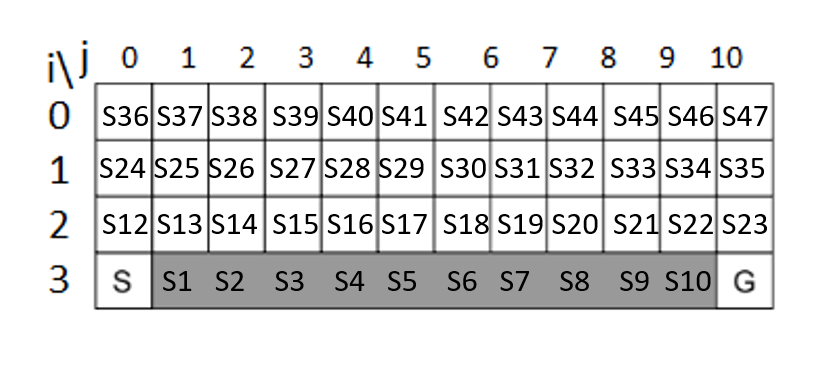

In [10]:
def step(state, action):
    """
    Choose next state for given action and state. 
    :param state: current state 
    :param action: current action 
    :return: reward, next_state, done
    """
    # Possible action
    i, j = state
    if action == UP:
        next_state = [max(i-1, 0),j]
    elif action == DOWN:
        next_state = [min(i+1, high-1), j] # high = 4 
    elif action == LEFT:
        next_state = [i, max(j-1, 0)]
    elif action == RIGHT:
        next_state = [i, min(j+1, length-1)] # len = 12 

    # Rules
    if (action == DOWN and i == (high-2) and j>0 and j<(length-1))  or (action == RIGHT and i == (high-1) and j == 0):
        reward = -100
        done = True
    elif(action == DOWN and i == (high-2) and j == (length-1)):
        reward = 0
        done = True
    else:
        reward = -1
        done = False

    return next_state, reward, done

In [11]:
def q_learning(num_episodes=500, epsilon=0.1, learning_rate=0.1, gamma=0.9):
    """
    Q_learing 
    """
    rewards=[]
    for _ in range(num_episodes):
        state = reset_game()
        done = False
        reward_sum = 0
       
        while not done:
            action = policy(q_values, state, epsilon) # wybieramy akcję 
            next_state, reward, done = step(state, action) # następny krok dla podanej akcji, nagroda, flaga 
            next_action =  policy(q_values, state, epsilon) # wybieramy następna akcję 
            reward_sum+= reward # dodajemy do ogólniej póli nagród, nagrodę zdobytą podczas jednego kroku 
            
            # Q(S,A)<- Q(S,A) + alpha*(reward+gamma*maxQ(S_next, A_next)-Q(S,A))
            q_values[state[0]][state[1]][action]+=learning_rate*(reward + gamma*(max(q_values[next_state[0]][next_state[1]])-q_values[state[0]][state[1]][action]))

            state=next_state
        rewards.append(reward_sum)

    return  rewards, q_values

In [12]:
def find_action_with_max_q(i,j):
    """
    Find action from current position with max q_values 
    """
    return np.argmax(q_values[i][j])

In [13]:
def print_action(action):
    """
    Print action 
    """
    if action == 0: print("UP")
    elif action == 1: print("DOWN")
    elif action == 2: print("RIGHT")
    elif action == 3: print("LEFT")

In [14]:
def change_position_after_action(state, action):
    """
    Return next state after action 
    """
    i,j = state
    if action == UP:
        next_state = [max(i-1, 0),j]
    elif action == DOWN:
        next_state = [min(i+1, high-1), j] # high = 4 
    elif action == LEFT:
        next_state = [i, max(j-1, 0)]
    elif action == RIGHT:
        next_state = [i, min(j+1, length-1)] # len = 12 
    return next_state

In [15]:
def show_optimal_acion():
    """
    Show optimal action from START to GOAL 
    """
    action = find_action_with_max_q(START[0], START[1])
    next_state =change_position_after_action(START, action)
    while next_state != GOAL:
        print_action(action)
        action = find_action_with_max_q(next_state[0], next_state[1])
        next_state =change_position_after_action(next_state, action)
        if next_state == GOAL:
            print_action(action)
            

In [16]:
 q_learning()

([-103,
  -113,
  -216,
  -119,
  -131,
  -117,
  -177,
  -123,
  -114,
  -148,
  -168,
  -169,
  -132,
  -123,
  -123,
  -158,
  -123,
  -125,
  -194,
  -101,
  -111,
  -129,
  -89,
  -179,
  -42,
  -118,
  -145,
  -198,
  -160,
  -74,
  -139,
  -59,
  -127,
  -126,
  -92,
  -133,
  -83,
  -106,
  -140,
  -117,
  -93,
  -57,
  -115,
  -114,
  -182,
  -170,
  -59,
  -68,
  -72,
  -63,
  -78,
  -124,
  -160,
  -37,
  -58,
  -90,
  -100,
  -51,
  -103,
  -95,
  -36,
  -134,
  -74,
  -100,
  -57,
  -70,
  -33,
  -145,
  -34,
  -80,
  -100,
  -42,
  -65,
  -145,
  -151,
  -115,
  -62,
  -103,
  -33,
  -139,
  -100,
  -134,
  -43,
  -141,
  -30,
  -74,
  -100,
  -46,
  -143,
  -35,
  -134,
  -37,
  -88,
  -126,
  -53,
  -40,
  -53,
  -51,
  -126,
  -42,
  -49,
  -128,
  -49,
  -44,
  -23,
  -69,
  -40,
  -38,
  -115,
  -102,
  -39,
  -125,
  -28,
  -48,
  -42,
  -61,
  -32,
  -53,
  -48,
  -52,
  -52,
  -30,
  -25,
  -115,
  -57,
  -20,
  -66,
  -102,
  -29,
  -32,
  -38,
  -37,
  -28,
  -5

In [17]:
show_optimal_acion()

UP
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
RIGHT
DOWN
